In [19]:
"""

Mode 0 and Hybrid Mode 0 models

"""

%matplotlib inline

import json
import matplotlib
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scipy.stats
import statistics
import sklearn.metrics

from IPython.display import display as d
from lmfit.model import Model, fit_report

# Read CSV data
test_data = pd.read_csv("test_data.csv", delimiter=",")
    
if not use_target_bitrate:
    test_data["video_target_bitrate"] = test_data["video_current_bitrate"]
    
d(test_data.head())
d(test_data["video_name"].unique())
d(len(test_data["video_name"].unique()))
d(len(test_data))

,test_index,video_name,src_hrc_id,src_hrc_q_id,video_target_bitrate,video_current_bitrate,video_width,video_height,video_resolution,video_frame_rate,...,video_median_SI,video_median_TI,video_max_SI,video_max_TI,video_min_SI,video_min_TI,video_stereoscopic,video_packet_loss,display_width,display_height
0,t1,concert,SRC1_HRC001,SRC1_HRC001_Q1_0-20,2453.432617,2453.432617,1920,1080,2073600,30.0,...,113.4585,5.69141,120.905,80.5321,84.1345,3.44253,0,0,2160,1200
1,t1,concert,SRC1_HRC002,SRC1_HRC002_Q2_0-20,2936.150391,2936.150391,1920,1080,2073600,30.0,...,119.5230,6.61275,124.132,81.1575,90.8096,4.44768,0,0,2160,1200
2,t1,concert,SRC1_HRC003,SRC1_HRC003_Q3_0-20,5397.188477,5397.188477,1920,1080,2073600,30.0,...,124.8810,7.55867,127.362,81.7269,95.3485,5.29980,0,0,2160,1200
3,t1,concert,SRC1_HRC004,SRC1_HRC004_Q4_0-20,8738.626953,8738.626953,1920,1080,2073600,30.0,...,125.7300,7.75470,128.050,81.8374,96.3679,5.52724,0,0,2160,1200
4,t1,concert,SRC1_HRC005,SRC1_HRC005_Q5_0-20,2970.417969,2970.417969,3840,1920,7372800,30.0,...,117.4510,7.14220,123.608,81.8516,60.8960,4.92720,0,0,2160,1200


array(['concert', 'fireworks', 'childs', 'etihad', 'angelfalls', 'dance',
       'antarctica', 'street', 'taipehtrainstation', 'newyorkcity',
       'mountainhiking', 'visitingtaipeh'], dtype=object)

12

191

In [20]:
# split the data into almost 50:50 without repetition of sources

tr_srcs = ['concert', 'fireworks', 'childs', 'etihad', 'angelfalls']#, 'dance']
vl_srcs = ['antarctica', 'street', 'taipehtrainstation', 'newyorkcity', 'mountainhiking', 'visitingtaipeh', 'dance']

df_tr = test_data[test_data.video_name.isin(tr_srcs)]
d(df_tr.head())
d(df_tr["test_index"].unique())
d(len(df_tr))

df_vl = test_data[test_data.video_name.isin(vl_srcs)]
d(df_vl.head())
d(df_vl["test_index"].unique())
d(len(df_vl))

d(test_data[test_data["test_index"] == "t1"]["video_name"].unique())
d(len(test_data[test_data["test_index"] == "t1"]))
d(test_data[test_data["test_index"] == "t2"]["video_name"].unique())
d(len(test_data[test_data["test_index"] == "t2"]))
d(test_data[test_data["test_index"] == "t3"]["video_name"].unique())
d(len(test_data[test_data["test_index"] == "t3"]))

d(len(df_tr[df_tr["test_index"] == "t1"]))
d(len(df_tr[df_tr["test_index"] == "t2"]))
d(len(df_tr[df_tr["test_index"] == "t3"]))

d(len(df_vl[df_vl["test_index"] == "t1"]))
d(len(df_vl[df_vl["test_index"] == "t2"]))
d(len(df_vl[df_vl["test_index"] == "t3"]))

,test_index,video_name,src_hrc_id,src_hrc_q_id,video_target_bitrate,video_current_bitrate,video_width,video_height,video_resolution,video_frame_rate,...,video_median_SI,video_median_TI,video_max_SI,video_max_TI,video_min_SI,video_min_TI,video_stereoscopic,video_packet_loss,display_width,display_height
0,t1,concert,SRC1_HRC001,SRC1_HRC001_Q1_0-20,2453.432617,2453.432617,1920,1080,2073600,30.0,...,113.4585,5.69141,120.905,80.5321,84.1345,3.44253,0,0,2160,1200
1,t1,concert,SRC1_HRC002,SRC1_HRC002_Q2_0-20,2936.150391,2936.150391,1920,1080,2073600,30.0,...,119.5230,6.61275,124.132,81.1575,90.8096,4.44768,0,0,2160,1200
2,t1,concert,SRC1_HRC003,SRC1_HRC003_Q3_0-20,5397.188477,5397.188477,1920,1080,2073600,30.0,...,124.8810,7.55867,127.362,81.7269,95.3485,5.29980,0,0,2160,1200
3,t1,concert,SRC1_HRC004,SRC1_HRC004_Q4_0-20,8738.626953,8738.626953,1920,1080,2073600,30.0,...,125.7300,7.75470,128.050,81.8374,96.3679,5.52724,0,0,2160,1200
4,t1,concert,SRC1_HRC005,SRC1_HRC005_Q5_0-20,2970.417969,2970.417969,3840,1920,7372800,30.0,...,117.4510,7.14220,123.608,81.8516,60.8960,4.92720,0,0,2160,1200


array(['t1', 't2', 't3'], dtype=object)

98

,test_index,video_name,src_hrc_id,src_hrc_q_id,video_target_bitrate,video_current_bitrate,video_width,video_height,video_resolution,video_frame_rate,...,video_median_SI,video_median_TI,video_max_SI,video_max_TI,video_min_SI,video_min_TI,video_stereoscopic,video_packet_loss,display_width,display_height
40,t1,dance,SRC6_HRC001,SRC6_HRC001_Q1_0-20,3440.376953,3440.376953,1920,1080,2073600,30.0,...,92.1829,19.18315,102.2670,38.5293,87.8111,0.682406,0,0,2160,1200
41,t1,dance,SRC6_HRC002,SRC6_HRC002_Q2_0-20,3915.049805,3915.049805,1920,1080,2073600,30.0,...,96.9505,19.85030,106.6480,39.0781,91.5701,0.637408,0,0,2160,1200
42,t1,dance,SRC6_HRC003,SRC6_HRC003_Q3_0-20,6321.414062,6321.414062,1920,1080,2073600,30.0,...,100.6170,20.22360,110.7830,39.4480,93.5766,0.524153,0,0,2160,1200
43,t1,dance,SRC6_HRC004,SRC6_HRC004_Q4_0-20,9669.626953,9669.626953,1920,1080,2073600,30.0,...,101.3450,20.28155,112.0250,39.5095,94.0506,0.523978,0,0,2160,1200
44,t1,dance,SRC6_HRC005,SRC6_HRC005_Q5_0-20,3929.295898,3929.295898,3840,1920,7372800,30.0,...,67.9072,20.08110,73.7739,39.2693,62.7719,0.841506,0,0,2160,1200


array(['t1', 't2', 't3'], dtype=object)

93

array(['concert', 'fireworks', 'childs', 'etihad', 'angelfalls', 'dance',
       'antarctica', 'street'], dtype=object)

64

array(['concert', 'fireworks', 'childs', 'etihad', 'angelfalls', 'dance',
       'antarctica', 'street'], dtype=object)

64

array(['fireworks', 'angelfalls', 'taipehtrainstation', 'newyorkcity',
       'mountainhiking', 'street', 'visitingtaipeh'], dtype=object)

63

40

40

18

24

24

45

In [21]:
"""

Mode 0 model

"""

def fit_func_mode0(features, a, b, c, d, e, f, g):
    s = a * np.log(features["video_target_bitrate"]) - b * np.log(
        features["video_resolution"]) - c * np.log(features["video_frame_rate"])
    mos = 1 - g * np.exp(-d * s + e) + f
    # mos = np.clip(mos, 1, 5)
    return mos

In [22]:
"""

Hybrid Mode 0 model

"""

def fit_func_hybrid_mode0(features, a, b, c, d, e, f, g, h, k):
    s = a * np.log(features["video_target_bitrate"]) - b * np.log(features["video_resolution"]) - c * np.log(
        features["video_frame_rate"]) - h * np.log(features["video_mean_TI"]) - k * np.log(
        features["video_mean_SI"])
    mos = 1 - g * np.exp(-d * s + e) + f
    # mos = np.clip(mos, 1, 5)
    return mos

In [23]:
"""
util functions

"""

def calculate_mse(prediction, target):
    return np.mean(np.square(prediction - target))

def rmse(data, X, Y):
    """ rmse caluclation

    Parameters
    ----------
    data : pandas dataframe
        stores all data
    X : str
        X column to be used
    Y : str
        Y column to be used
    """
    assert X in data and Y in data
    return np.sqrt(sklearn.metrics.mean_squared_error(data[X], data[Y]))

def eval_plots_regression(truth, pred, title="", folder="", plotname=""):
    df = pd.DataFrame({"truth": truth, "predicted": pred})
    bounds = (1, 5)

    ax = df.plot(x="predicted",
                 y="truth",
                 kind="scatter",
                 xlim=bounds,
                 ylim=bounds,
                 figsize=(5, 4),
                 title=title,
                 fontsize=14
                 )
    ax.grid(False)
    ax.yaxis.label.set_size(14)
    ax.xaxis.label.set_size(14)
    ax.plot(bounds, bounds, 'k--', lw=2, color="gray")
    # ax.text(-0.5, -0.5, "opt", horizontalalignment='center',  bbox=dict(facecolor='lightgray', alpha=0.5))
    os.makedirs(folder, exist_ok=True)
    ax.get_figure().savefig(folder + "/scatter_{}.pdf".format(plotname), dpi=300, bbox_inches='tight')
    # ax.get_figure().savefig(folder + "/scatter_{}.pdf".format(plotname))


[[Model]]
    Model(fit_func_mode0)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 432
    # data points      = 98
    # variables        = 7
    chi-square         = 14.9574413
    reduced chi-square = 0.16436749
    Akaike info crit   = -170.216338
    Bayesian info crit = -152.121566
[[Variables]]
    a:  1.82535477 +/- 573905.123 (31440744.25%) (init = 1)
    b: -0.31659708 +/- 99540.4737 (31440743.00%) (init = 1)
    c:  3.30577112 +/- 428396.534 (12959050.04%) (init = 1)
    d:  0.65665223 +/- 206456.366 (31440747.09%) (init = 1)
    e:  4.70062829 +/- 4430183.49 (94246624.37%) (init = 1)
    f:  3.17673736 +/- 0.19775555 (6.23%) (init = 1)
    g:  3.51548052 +/- 3084075.05 (87728406.70%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -3.123
    C(b, c) =  3.123
    C(c, d) =  2.035
    C(c, e) = -1.544
    C(a, g) =  1.472
    C(d, g) = -1.472
    C(b, g) = -1.472
    C(c, g) =  1.321
    C(a, b) = -1.000
    C(a, d)

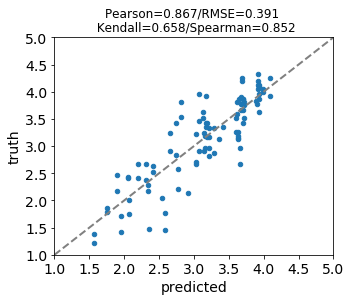

In [24]:
model_name = "Mode0"
features = df_tr.copy()

gmodel = Model(fit_func_mode0)

mode0_result = gmodel.fit(features["MOS"], features=features[["video_target_bitrate", "video_resolution",
                                                              "video_frame_rate", "video_mean_TI", "video_mean_SI"]],
                          a=1, b=1, c=1, d=1, e=1, f=1, g=1, nan_policy="propagate")

features["predicted_MOS"] = mode0_result.best_fit
print(mode0_result.fit_report())
pearson = scipy.stats.pearsonr(features["predicted_MOS"], features["MOS"])[0]
rmse_final = np.sqrt(calculate_mse(features["predicted_MOS"], features["MOS"]))
kendall = scipy.stats.kendalltau(features["predicted_MOS"], features["MOS"])[0]
spearman = scipy.stats.spearmanr(features["predicted_MOS"], features["MOS"])[0]
r2_score = sklearn.metrics.r2_score(features["predicted_MOS"], features["MOS"])
print("Correlation for mode0 model applied on all tests: ")
print("Pearson: %s" % (pearson))
print("RMSE: %s" % (rmse_final))
print("Kendall: %s" % (kendall))
print("Spearman: %s" % (spearman))
print("R2_Score: %s" % (r2_score))

eval_plots_regression(features["MOS"], features["predicted_MOS"], "Pearson=%s/RMSE=%s \n Kendall=%s/Spearman=%s" %
                      (round(pearson, 3), round(rmse_final, 3), round(kendall, 3), round(spearman, 3)),
                      "figures", "Mode0")

[[Model]]
    Model(fit_func_hybrid_mode0)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 624
    # data points      = 98
    # variables        = 9
    chi-square         = 12.4340541
    reduced chi-square = 0.13970847
    Akaike info crit   = -184.323790
    Bayesian info crit = -161.059083
[[Variables]]
    a:  1.35541850 +/- 252782.431 (18649769.83%) (init = 1)
    b: -0.17889937 +/- 33338.4373 (18635301.91%) (init = 1)
    c:  2.20389692 +/- 504665.187 (22898765.52%) (init = 1)
    d:  0.99556039 +/- 184999.387 (18582437.46%) (init = 1)
    e:  4.58641777 +/- 2687278.61 (58592102.81%) (init = 1)
    f:  3.10786617 +/- 0.15340744 (4.94%) (init = 1)
    g:  3.81913906 +/- 8272894.96 (216616751.22%) (init = 1)
    h:  0.17416029 +/- 32476.3491 (18647390.13%) (init = 1)
    k:  0.09952803 +/- 18558.0278 (18646030.73%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, d) =  2.240
    C(c, h) = -2.240
    C(c, k) = -2.240
    C(e, 

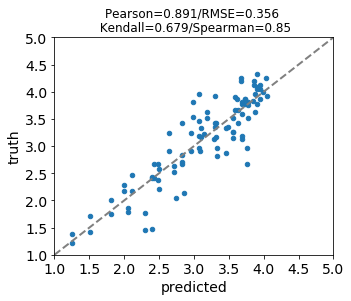

In [25]:
model_name = "Hybrid Mode0"

gmodel = Model(fit_func_hybrid_mode0)

mode0_result = gmodel.fit(features["MOS"], features=features[["video_target_bitrate", "video_resolution",
                                                              "video_frame_rate", "video_mean_TI", "video_mean_SI"]],
                          a=1, b=1, c=1, d=1, e=1, f=1, g=1, h=1, k=1, nan_policy="propagate")

features["predicted_MOS"] = mode0_result.best_fit
print(mode0_result.fit_report())
pearson = scipy.stats.pearsonr(features["predicted_MOS"], features["MOS"])[0]
rmse_final = np.sqrt(calculate_mse(features["predicted_MOS"], features["MOS"]))
kendall = scipy.stats.kendalltau(features["predicted_MOS"], features["MOS"])[0]
spearman = scipy.stats.spearmanr(features["predicted_MOS"], features["MOS"])[0]
r2_score = sklearn.metrics.r2_score(features["predicted_MOS"], features["MOS"])
print("Correlation for mode0 model applied on all tests: ")
print("Pearson: %s" % (pearson))
print("RMSE: %s" % (rmse_final))
print("Kendall: %s" % (kendall))
print("Spearman: %s" % (spearman))
print("R2_Score: %s" % (r2_score))

eval_plots_regression(features["MOS"], features["predicted_MOS"], "Pearson=%s/RMSE=%s \n Kendall=%s/Spearman=%s" %
                      (round(pearson, 3), round(rmse_final, 3), round(kendall, 3), round(spearman, 2)),
                      "figures", "HybridMode0")

   test_index video_name   src_hrc_id         src_hrc_q_id  \
40         t1      dance  SRC6_HRC001  SRC6_HRC001_Q1_0-20   
41         t1      dance  SRC6_HRC002  SRC6_HRC002_Q2_0-20   
42         t1      dance  SRC6_HRC003  SRC6_HRC003_Q3_0-20   
43         t1      dance  SRC6_HRC004  SRC6_HRC004_Q4_0-20   
44         t1      dance  SRC6_HRC005  SRC6_HRC005_Q5_0-20   

    video_target_bitrate  video_current_bitrate  video_width  video_height  \
40           3440.376953            3440.376953         1920          1080   
41           3915.049805            3915.049805         1920          1080   
42           6321.414062            6321.414062         1920          1080   
43           9669.626953            9669.626953         1920          1080   
44           3929.295898            3929.295898         3840          1920   

    video_resolution  video_frame_rate  ... video_median_TI  video_max_SI  \
40           2073600              30.0  ...        19.18315      102.2670   
41  

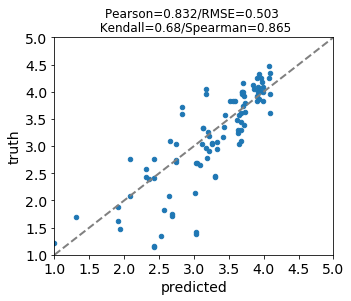

In [26]:
"""

Validation Mode 0 Model

"""

validation_data = df_vl.copy()

"""
a =  1.82535477 
b = -0.31659708 
c =  3.30577112 
d =  0.65665223 
e =  4.70062829 
f =  3.17673736 
g =  3.51548052
"""

# def fit_func_mode0(features, a=0.63705436, b=-0.12639577, c=-1.25051917, d=1.35983598, 
#                    e=14.6960678, f=3.49209473, g=3.492094735):
def fit_func_mode0(features):
    a =  1.82535477 
    b = -0.31659708 
    c =  3.30577112 
    d1 =  0.65665223 
    e =  4.70062829 
    f =  3.17673736 
    g =  3.51548052

    s = a * np.log(features["video_target_bitrate"]) - b * np.log(
        features["video_resolution"]) - c * np.log(features["video_frame_rate"])
    mos = 1 - g * np.exp(-d1 * s + e) + f
    mos = np.clip(mos, 1, 5)
    return mos



validation_data["predicted_MOS"] = fit_func_mode0(features=validation_data[["video_target_bitrate",
                                                                   "video_resolution",
                                                                   "video_frame_rate"]])
print(validation_data.head())

pearson = scipy.stats.pearsonr(validation_data["predicted_MOS"], validation_data["MOS"])[0]
rmse_final = np.sqrt(calculate_mse(validation_data["predicted_MOS"], validation_data["MOS"]))
kendall = scipy.stats.kendalltau(validation_data["predicted_MOS"], validation_data["MOS"])[0]
spearman = scipy.stats.spearmanr(validation_data["predicted_MOS"], validation_data["MOS"])[0]
r2_score = sklearn.metrics.r2_score(validation_data["predicted_MOS"], validation_data["MOS"])
print("Correlation for mode0 model applied on validation database: ")
print("Pearson: %s" % (pearson))
print("RMSE: %s" % (rmse_final))
print("Kendall: %s" % (kendall))
print("Spearman: %s" % (spearman))
print("R2_Score: %s" % (r2_score))

eval_plots_regression(validation_data["MOS"], validation_data["predicted_MOS"], "Pearson=%s/RMSE=%s \n Kendall=%s/Spearman=%s" %
                      (round(pearson, 3), round(rmse_final, 3), round(kendall, 3), round(spearman, 3)),
                      "figures", "Mode0_validation")

    test_index      video_name   src_hrc_id         src_hrc_q_id  \
40          t1           dance  SRC6_HRC001  SRC6_HRC001_Q1_0-20   
41          t1           dance  SRC6_HRC002  SRC6_HRC002_Q2_0-20   
42          t1           dance  SRC6_HRC003  SRC6_HRC003_Q3_0-20   
43          t1           dance  SRC6_HRC004  SRC6_HRC004_Q4_0-20   
44          t1           dance  SRC6_HRC005  SRC6_HRC005_Q5_0-20   
45          t1           dance  SRC6_HRC006  SRC6_HRC006_Q6_0-20   
46          t1           dance  SRC6_HRC007  SRC6_HRC007_Q7_0-20   
47          t1           dance  SRC6_HRC008  SRC6_HRC008_Q8_0-20   
48          t1      antarctica  SRC7_HRC001  SRC7_HRC001_Q1_0-20   
49          t1      antarctica  SRC7_HRC002  SRC7_HRC002_Q2_0-20   
50          t1      antarctica  SRC7_HRC003  SRC7_HRC003_Q3_0-20   
51          t1      antarctica  SRC7_HRC004  SRC7_HRC004_Q4_0-20   
52          t1      antarctica  SRC7_HRC005  SRC7_HRC005_Q5_0-20   
53          t1      antarctica  SRC7_HRC006  SRC

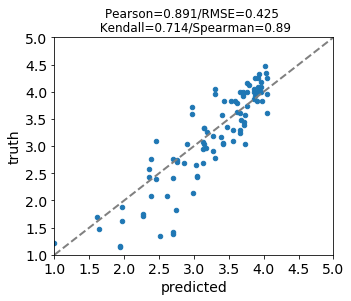

In [27]:
"""

Validation Hybrid Mode 0 Model

"""

# Read CSV data
col_list = ["PvsId", "filename", "video_name", "Resolution", "video_target_bitrate", "Bitrate", "video_codec", "video_frame_rate", "MOS", "video_mean_SI", "video_mean_TI", "video_median_SI", "video_median_TI", "video_max_SI", "video_max_TI", "video_min_SI", "video_min_TI", "Framerate"]

validation_data = df_vl.copy()

# def fit_func_hybrid_mode0(features, a=1.78978578, b=-0.25122257, c=1.75240270, d=0.58557555, 
#                    e=5.62563819, f=3.34997686, g=4.16856635, h=0.34767832, k=0.20232389):
def fit_func_hybrid_mode0(features):
    a =  1.35541850
    b = -0.17889937
    c =  2.20389692
    d1 =  0.99556039
    e =  4.58641777
    f =  3.10786617
    g =  3.81913906
    h =  0.17416029
    k =  0.09952803

    s = a * np.log(features["video_target_bitrate"]) - b * np.log(features["video_resolution"]) - c * np.log(
        features["video_frame_rate"]) - h * np.log(features["video_mean_TI"]) - k * np.log(
        features["video_mean_SI"])
    mos = 1 - g * np.exp(-d1 * s + e) + f
    mos = np.clip(mos, 1, 5)
    return mos


validation_data["predicted_MOS"] = fit_func_hybrid_mode0(features=validation_data[["video_target_bitrate", "video_resolution",
                                                              "video_frame_rate", "video_mean_TI", "video_mean_SI"]])
print(validation_data)

pearson = scipy.stats.pearsonr(validation_data["predicted_MOS"], validation_data["MOS"])[0]
rmse_final = rmse(validation_data, "predicted_MOS", "MOS")
kendall = scipy.stats.kendalltau(validation_data["predicted_MOS"], validation_data["MOS"])[0]
spearman = scipy.stats.spearmanr(validation_data["predicted_MOS"], validation_data["MOS"])[0]
r2_score = sklearn.metrics.r2_score(validation_data["predicted_MOS"], validation_data["MOS"])
print("Correlation for hybrid mode0 model applied on validation database: ")
print("Pearson: %s" % (pearson))
print("RMSE: %s" % (rmse_final))
print("Kendall: %s" % (kendall))
print("Spearman: %s" % (spearman))
print("R2_Score: %s" % (r2_score))

eval_plots_regression(validation_data["MOS"], validation_data["predicted_MOS"], "Pearson=%s/RMSE=%s \n Kendall=%s/Spearman=%s" %
                      (round(pearson, 3), round(rmse_final, 3), round(kendall, 3), round(spearman, 2)),
                      "figures", "HybridMode0_validation")